In [3]:
datadir='/dls/i16/data/2018/mt19049-1/'

import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
%matplotlib nbagg
from matplotlib.pyplot import *
from numpy import *
#from dlstools.quickfit import *
#from dlstools.dirty_fit import fit
from dlstools import dataloader
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus2m_path_template)
psnap=dataloader.tiffloader(datadir+'snapped-data/pilatus2M/'+'%05i.tif')

=== Importing dlstools package


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


Could not import plotting routines
No module named py4j.java_gateway


In [2]:
#function used later...
def im_diff_sum(scans, minfrac):
    import sys

    d(scans[0]); p(1); im_pos_sum=p.image_01*0; im_neg_sum=p.image_01*0;

    for scan in scans:
        d(scan); plot(d.sum)
        min_sum_threshold=minfrac*d.sum[0]
        cycle=0

        ncycles=len(d.sum)/4
        for i in range(ncycles):
            imlist=[]; Vdemlist=[]; bad=False
            for j in range(4):
                sys.stdout.write(str(i*4+j)+'\r')
                p(d.path[i*4+j]);  imlist+=[p.image_01];  Vdemlist+=[d.Vdem[i*4+j]]
                if d.sum[i*4+j]<min_sum_threshold:
                    bad=True; #print "======  bad one ========"
            #print Vdemlist, bad
            if bad==False:
                im_pos_sum+=imlist[0]+imlist[3]
                im_neg_sum+=imlist[1]+imlist[2]
                cycle+=1        
        print "=== Good cycles: %i Total: %i" % (cycle, ncycles)       
    return(im_pos_sum, im_neg_sum)


#tmp=array([[1,3,4,5],[2,7,4,3],[8,3,1,0],[2,1,5,2],[2,7,4,3],[6,2,3,4]])

def array_shrink(array_old, ifac, jfac):
    #add array elements in ifac x jfac blocks to make smaller array
    ilen, jlen = array_old.shape
    inew, jnew = ilen/ifac, jlen/jfac
    array_new=zeros([inew, jnew])
    #print inew, jnew, array_new
    for i in range(inew):
        for j in range(jnew):
            for isum in range(ifac):
                for jsum in range(jfac):
                    array_new[i,j]=sum(array_old[i*ifac:(i+1)*ifac, j*jfac:(j+1)*jfac])
    return array_new


<IPython.core.display.Javascript object>


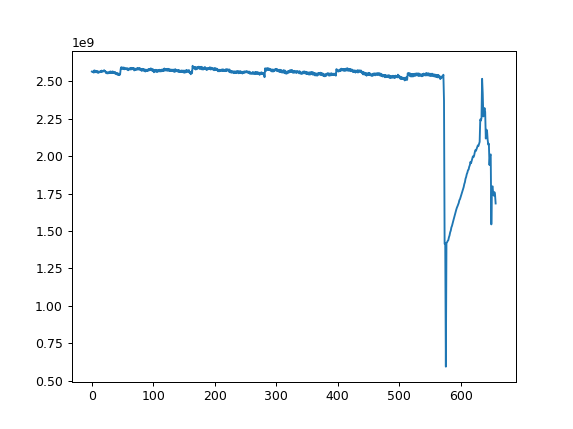

<IPython.core.display.Javascript object>


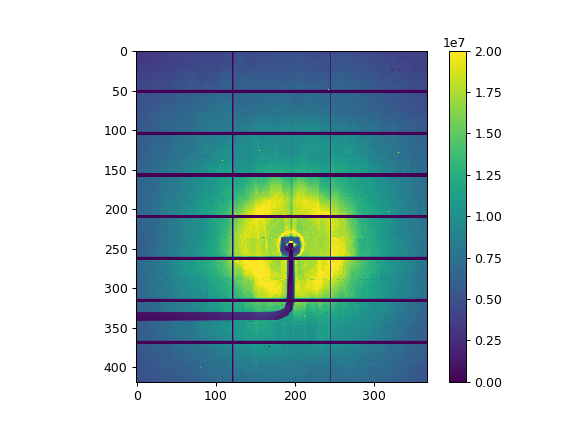

<IPython.core.display.Javascript object>


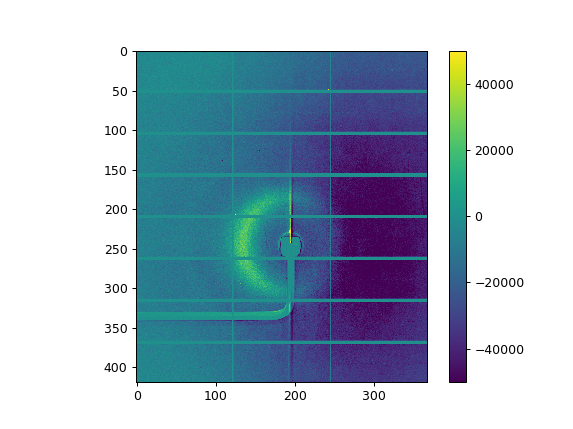

In [10]:
d(692383) # only see difference with wrong sequence! (02/13) but looks interesting. Can see sample move in field.
figure(); plot(d.sum)
p_count=0; n_count=0
p(1); im_pos_sum=p.image_01*0; im_neg_sum=p.image_01*0;
for i in range(0,520):
    p(d.path[i])
#    print i
    if d.hv_sequence[i]==0 or d.hv_sequence[i]==2:
#    if d.Vdem[i]<0:
        p_count+=1; im_neg_sum+=p.image_01
    else:
        n_count+=1; im_pos_sum+=p.image_01
im_sum=im_pos_sum + im_neg_sum
im_diff=im_pos_sum - im_neg_sum
#figure(); imshow(im_sum); clim([0,1e6]); colorbar()
#figure(); imshow(im_diff); clim([-2000, 2000]); colorbar()

new_sum=array_shrink(im_sum,4,4)
new_diff=array_shrink(im_diff,4,4)

figure(); imshow(new_sum); clim([0,2e7]); colorbar()
figure(); imshow(new_diff); clim([-5e4, 5e4]); colorbar()
savefig('/home/spc93/tmp/run_692383.pdf')






<IPython.core.display.Javascript object>


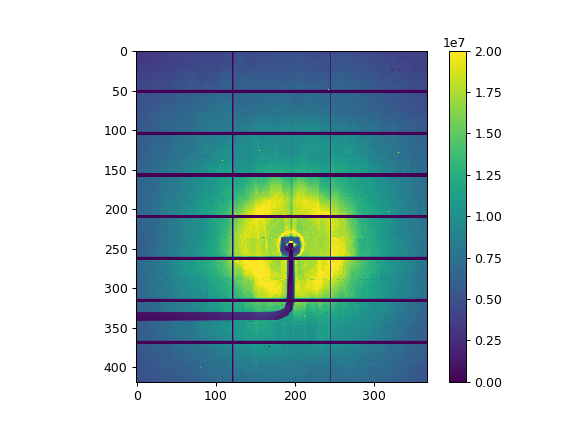

<IPython.core.display.Javascript object>


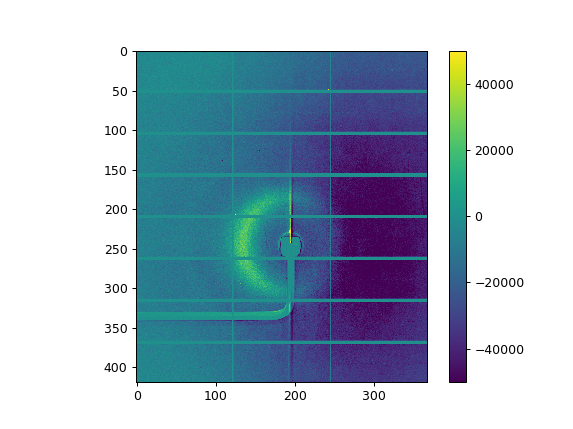

In [8]:
figure(); imshow(new_sum); clim([0,2e7]); colorbar()
figure(); imshow(new_diff); clim([-5e4, 5e4]); colorbar()
savefig('/home/spc93/tmp/run_692383.pdf')

<IPython.core.display.Javascript object>


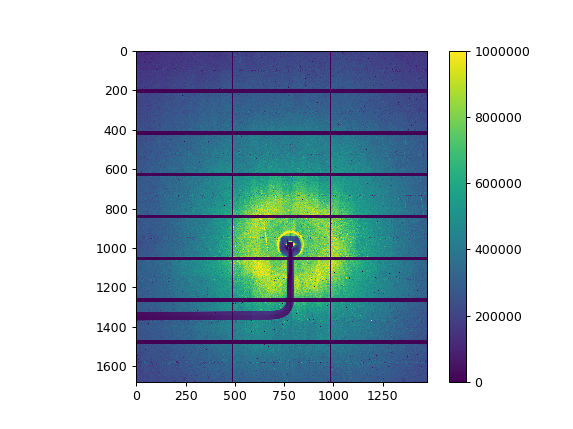

<IPython.core.display.Javascript object>


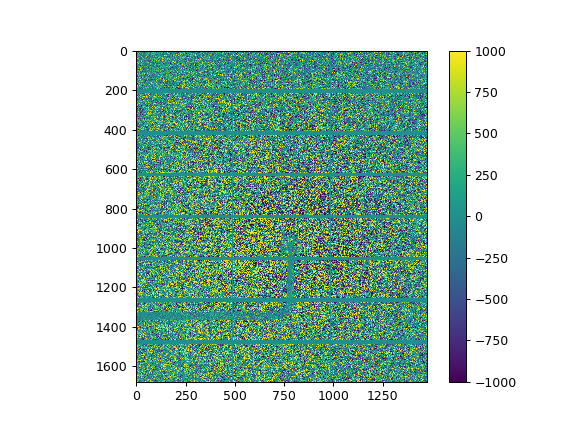

In [84]:
d(692397)
#figure(); plot(d.sum)
p_count=0; n_count=0
p(1); im_pos_sum=p.image_01*0; im_neg_sum=p.image_01*0;
for i in range(len(d.sum)):
    p(d.path[i])
#    print i
    if d.hv_sequence[i]==0 or d.hv_sequence[i]==3:
#    if d.Vdem[i]<0:
        p_count+=1; im_neg_sum+=p.image_01
    else:
        n_count+=1; im_pos_sum+=p.image_01
im_sum=im_pos_sum + im_neg_sum
im_diff=im_pos_sum - im_neg_sum
figure(); imshow(im_sum); clim([0,1e6]); colorbar()
figure(); imshow(im_diff); clim([-1000, 1000]); colorbar()


<IPython.core.display.Javascript object>


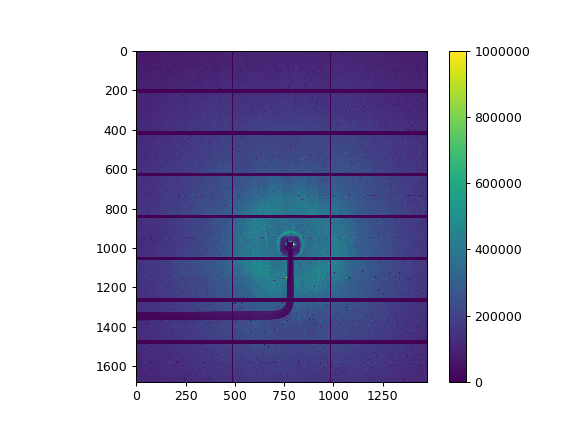

<IPython.core.display.Javascript object>


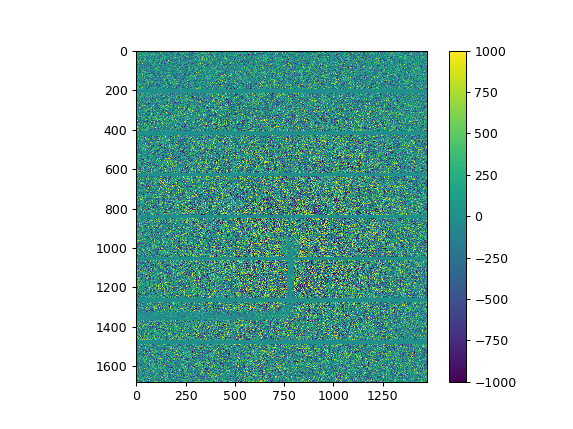

In [87]:
d(692398)
#figure(); plot(d.sum)
p_count=0; n_count=0
p(1); im_pos_sum=p.image_01*0; im_neg_sum=p.image_01*0;
for i in range(len(d.sum)):
    p(d.path[i])
#    print i
    if d.hv_sequence[i]==0 or d.hv_sequence[i]==3:
#    if d.Vdem[i]<0:
        p_count+=1; im_neg_sum+=p.image_01
    else:
        n_count+=1; im_pos_sum+=p.image_01
im_sum=im_pos_sum + im_neg_sum
im_diff=im_pos_sum - im_neg_sum
figure(); imshow(im_sum); clim([0,1e6]); colorbar()
figure(); imshow(im_diff); clim([-1000, 1000]); colorbar()


<IPython.core.display.Javascript object>


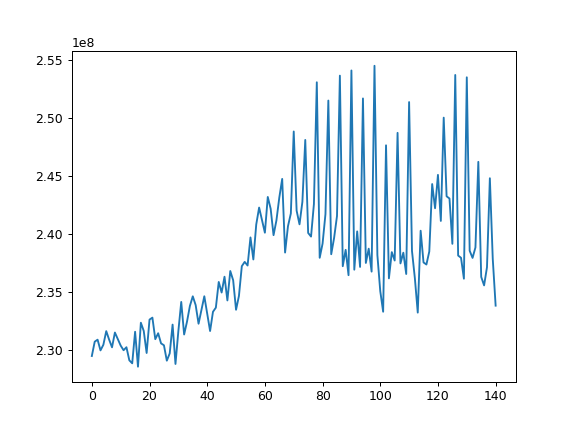

<IPython.core.display.Javascript object>


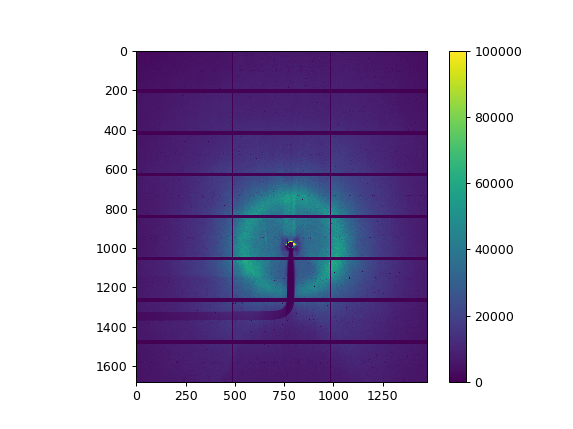

<IPython.core.display.Javascript object>


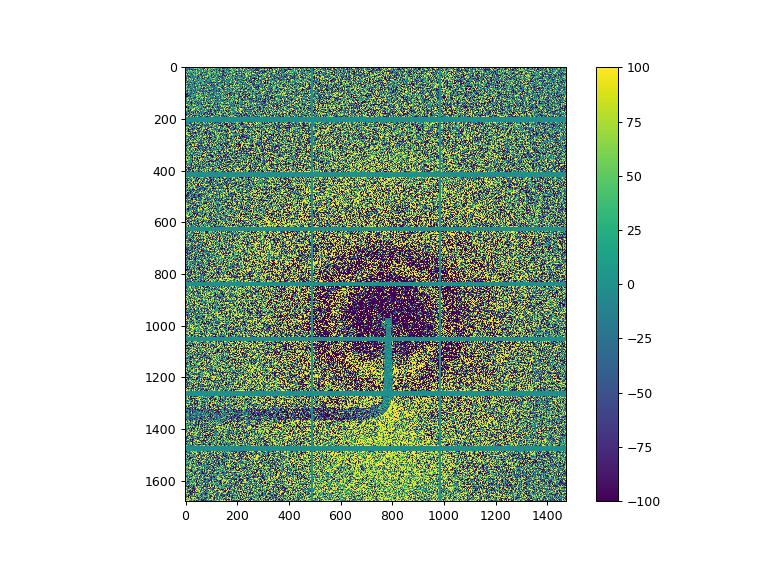

In [100]:
#2-bromopropene (short runs between bubbles) #692427 & 340, 333, 433 (with lead shield) - nothing much
#692445, 46 (lower energy)
d(692446)
figure(); plot(d.sum)
p_count=0; n_count=0
p(1); im_pos_sum=p.image_01*0; im_neg_sum=p.image_01*0;
for i in range(len(d.sum)):
    p(d.path[i])
#    print i
    if d.hv_sequence[i]==0 or d.hv_sequence[i]==3:
#    if d.Vdem[i]<0:
        p_count+=1; im_neg_sum+=p.image_01
    else:
        n_count+=1; im_pos_sum+=p.image_01
im_sum=im_pos_sum + im_neg_sum
im_diff=im_pos_sum - im_neg_sum
figure(); imshow(im_sum); clim([0,1e5]); colorbar()
figure(); imshow(im_diff); clim([-100, 100]); colorbar()

<IPython.core.display.Javascript object>


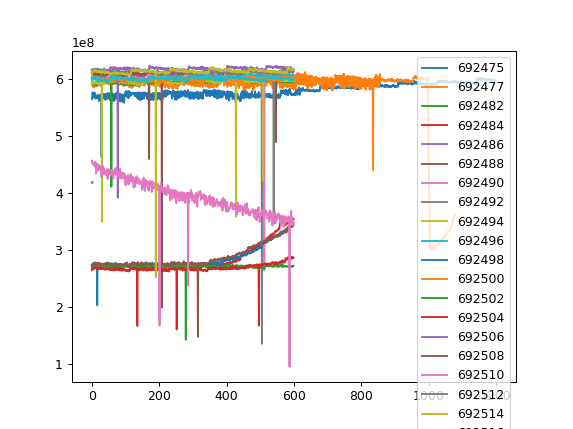

<IPython.core.display.Javascript object>


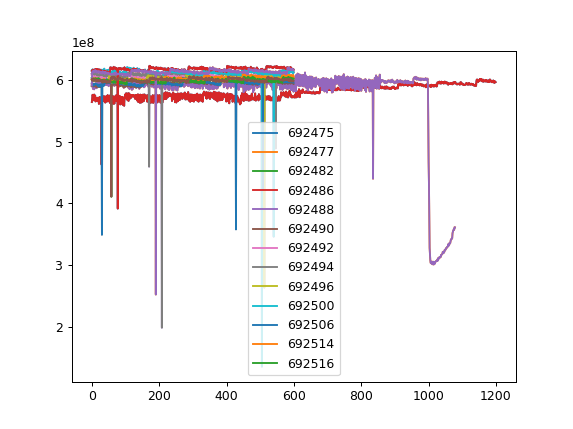

=== Good cycles: 299 Total: 300
=== Good cycles: 248 Total: 269
=== Good cycles: 149 Total: 150
=== Good cycles: 150 Total: 150
=== Good cycles: 147 Total: 150
=== Good cycles: 149 Total: 150
=== Good cycles: 148 Total: 150
=== Good cycles: 147 Total: 150
=== Good cycles: 150 Total: 150
=== Good cycles: 150 Total: 150
=== Good cycles: 149 Total: 150
=== Good cycles: 149 Total: 150
=== Good cycles: 150 Total: 150
=== Ratio of sums before normalization:  0.999966561785


<IPython.core.display.Javascript object>


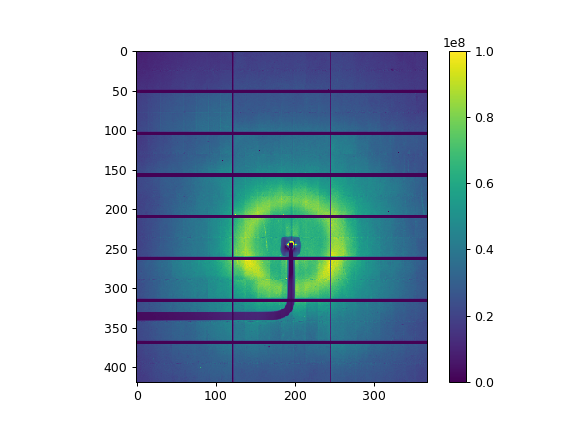

<IPython.core.display.Javascript object>


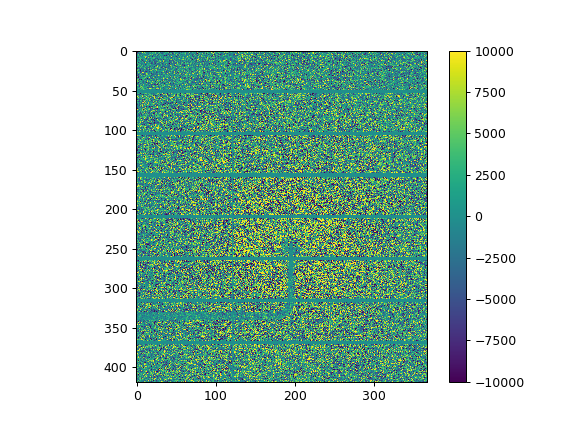

In [17]:
################ long collection (1 of 2)
#1-Br4Fbenzene 14.0 keV #692475 (long)
#692475 (no bubble), 692477 (bubble formed after an hour)
# 82... short scans at random points on sample

#gda script (from day19april2018a.py)
#pos pilatus2m_thresh 13.25
#pos energy 14
#692481 start 15:14 20/4/18  #692513 07:58 21/04/2018
#last 516 #failed in night (motor error?) have quite a lot of data
#while True:
#    szval=szmin+(szmax-szmin)*random.random()
#    pos sz szval
#    scancn sy .01 31 pil2ms .5
#    go maxval
#    scan x 1 150 1 hv1100 0 3 1 ic1 pil2ms 2


allscans=[692475, 692477]+range(692482, 692516+1, 2); figure(); [plot(d(i).sum, label=str(i)) for i in allscans]; legend(); show();
goodscans=[i for i in allscans if d(i).sum[0]>5e8]; figure(); [plot(d(i).sum, label=str(i)) for i in goodscans]; legend(); show();

(im_pos_sum, im_neg_sum)=im_diff_sum(goodscans, 0.9)

r=sum(im_pos_sum)*1.0/sum(im_neg_sum)

im_sum=im_pos_sum+im_neg_sum
im_diff=im_pos_sum-im_neg_sum*r
print '=== Ratio of sums before normalization: ',sum(im_pos_sum)*1.0/sum(im_neg_sum)

#figure(); imshow(im_sum); clim([0,5e6]); colorbar()
#figure(); imshow(im_diff); clim([-2000, 2000]); colorbar()

#### nothing in difference: noise ~ 10-3/pixel

new_sum=array_shrink(im_sum,4,4)
new_diff=array_shrink(im_diff,4,4)

figure(); imshow(new_sum); clim([0,1e8]); colorbar()
savefig('/home/spc93/tmp/Br4Fbenzene_sum.pdf')
figure(); imshow(new_diff); clim([-1e4, 1e4]); colorbar()
savefig('/home/spc93/tmp/Br4Fbenzene_diff.pdf')




<IPython.core.display.Javascript object>


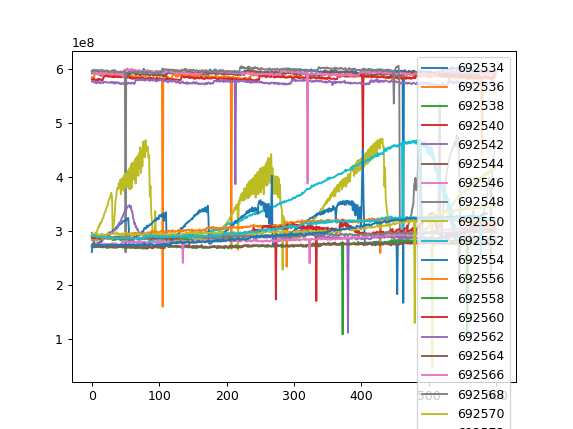

<IPython.core.display.Javascript object>


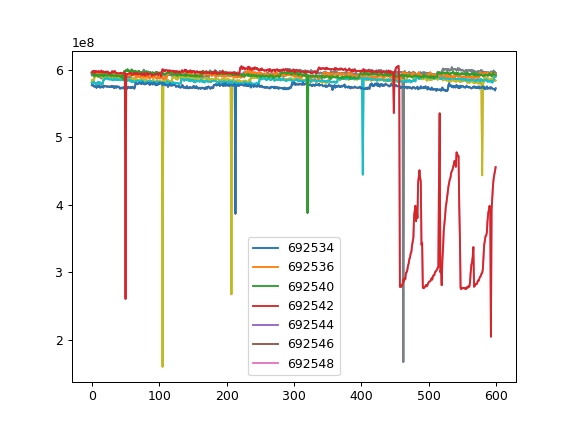

=== Good cycles: 149 Total: 150
=== Good cycles: 147 Total: 150
=== Good cycles: 149 Total: 150
=== Good cycles: 149 Total: 150
=== Good cycles: 150 Total: 150
=== Good cycles: 149 Total: 150
=== Good cycles: 112 Total: 150
=== Ratio of sums before normalization:  0.999876242352


<IPython.core.display.Javascript object>


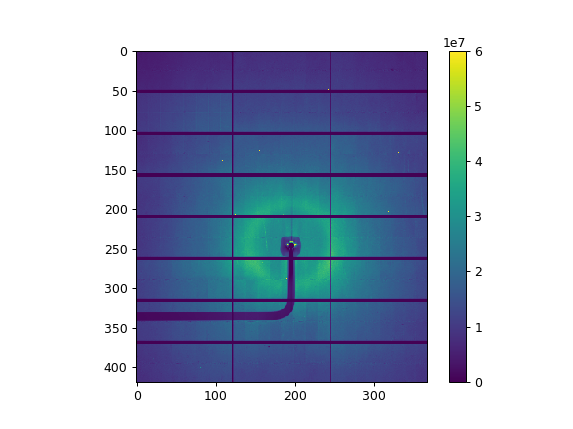

<IPython.core.display.Javascript object>


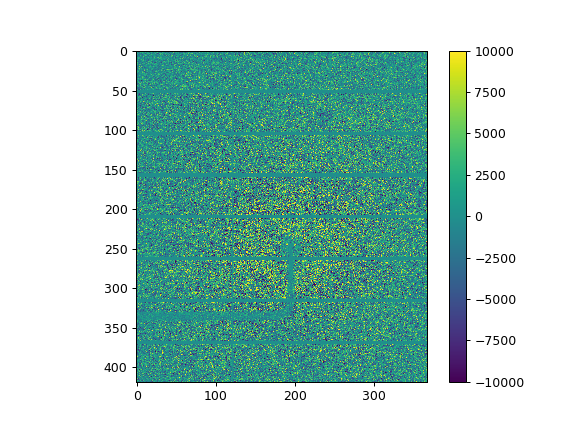

In [14]:
################ long collection (2 of 2)
#2-bromopropene

#same script as previous
#692534...42...
#energy 14 keV, pil2m threshold 13.25 keV gain 7-30 keV (low)

allscans=range(692534, 692574+1, 2); figure(); [plot(d(i).sum, label=str(i)) for i in allscans]; legend(); show();
goodscans=[i for i in allscans if d(i).sum[0]>5e8]; figure(); [plot(d(i).sum, label=str(i)) for i in goodscans]; legend(); show();

(im_pos_sum, im_neg_sum)=im_diff_sum(goodscans, 0.9)

r=sum(im_pos_sum)*1.0/sum(im_neg_sum)

im_sum=im_pos_sum+im_neg_sum
im_diff=im_pos_sum-im_neg_sum*r
print '=== Ratio of sums before normalization: ',sum(im_pos_sum)*1.0/sum(im_neg_sum)

#figure(); imshow(im_sum); clim([0,5e6]); colorbar()
#figure(); imshow(im_diff); clim([-2000, 2000]); colorbar()

new_sum=array_shrink(im_sum,4,4)
new_diff=array_shrink(im_diff,4,4)

figure(); imshow(new_sum); clim([0,6e7]); colorbar()
figure(); imshow(new_diff); clim([-1e4, 1e4]); colorbar()
savefig('/home/spc93/tmp/bromopropene_diff.pdf')


<IPython.core.display.Javascript object>


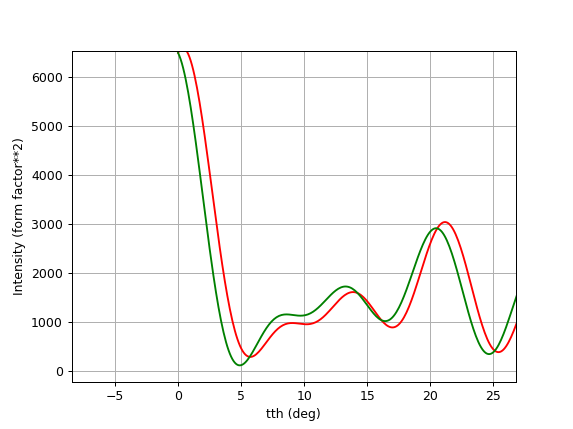

In [4]:
import numpy as np

def blah(dict):
    tth_deg=np.arange(0,60.0,.1)
    lam=12.4/33.3
    #q=np.arange(.1,5.0,.05)
    q=2*np.pi*np.sin(tth_deg/2*np.pi/180)/lam
    fp=0; fn=0;
    for atom in dict:
       fp+=atom['z_eff']*np.exp(1.0J*q*atom['posn'])
       fn+=atom['z_eff']*np.exp(-1.0J*q*atom['posn'])
    Ip=np.abs(fp)**2
    In=np.abs(fn)**2
    #print Ip, In
    figure(); plot(tth_deg,Ip,'r'); plot(tth_deg,In,'g'); xlabel('tth (deg)'); ylabel('Intensity (form factor**2)'); grid(1)
    
BF_benzene=[
        {'name':'c1', 'z_eff':6.0, 'posn':1.895},
        {'name':'c2', 'z_eff':6.0, 'posn':2.59},
        {'name':'c3', 'z_eff':6.0, 'posn':3.98},
        {'name':'c4', 'z_eff':6.0, 'posn':4.675},
        {'name':'c5', 'z_eff':6.0, 'posn':3.98},
        {'name':'c6', 'z_eff':6.0, 'posn':2.95},
        {'name':'F', 'z_eff':9.0, 'posn':6.065},
        {'name':'Br1', 'z_eff':35.0+10.0J, 'posn':0.0},
      ]

Bromopropene=[
        {'name':'c1', 'z_eff':6.0, 'posn':-1.4462},
        {'name':'c2', 'z_eff':6.0, 'posn':0},
        {'name':'c3', 'z_eff':6.0, 'posn':1.4427},
        {'name':'c4', 'z_eff':6.0, 'posn':2.5356},
        {'name':'Br1', 'z_eff':35.0+10.0J, 'posn':0.0},
      ]
blah(BF_benzene)
#savefig('/home/spc93/tmp/BF_benzene_calc.pdf')    
    
